<a href="https://colab.research.google.com/github/Sion1225/Study-Deeplearning-NLP/blob/master/BIO_NER_using_BiLSTM_%26_F1_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Annotated Corpus for Named Entity Recognition (https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus)

In [35]:
import pandas as pd
import numpy as np
import matplotlib as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [36]:
data = pd.read_csv("/content/drive/MyDrive/GitHub/Study-Deeplearning-NLP/DataSet/ner_dataset.csv", encoding="latin1")

In [37]:
data[:30]

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [38]:
print("Length of Data : ", len(data))

Length of Data :  1048575


In [39]:
print("Witch row have Null")
print(data.isnull().sum())

Witch row have Null
Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64


In [40]:
print("Sentence row's unique value : ", data["Sentence #"].nunique())
print("Word row's unique value : ", data["Word"].nunique())
print("Tag row's unique value : ", data["Tag"].nunique())

Sentence row's unique value :  47959
Word row's unique value :  35178
Tag row's unique value :  17


In [41]:
print(data.groupby("Tag").size().reset_index(name="count"))

      Tag   count
0   B-art     402
1   B-eve     308
2   B-geo   37644
3   B-gpe   15870
4   B-nat     201
5   B-org   20143
6   B-per   16990
7   B-tim   20333
8   I-art     297
9   I-eve     253
10  I-geo    7414
11  I-gpe     198
12  I-nat      51
13  I-org   16784
14  I-per   17251
15  I-tim    6528
16      O  887908


In [42]:
data = data.fillna(method="ffill")
print(data.tail())

              Sentence #       Word  POS Tag
1048570  Sentence: 47959       they  PRP   O
1048571  Sentence: 47959  responded  VBD   O
1048572  Sentence: 47959         to   TO   O
1048573  Sentence: 47959        the   DT   O
1048574  Sentence: 47959     attack   NN   O


In [43]:
data.isnull().values.any()

False

In [44]:
data["Word"] = data["Word"].str.lower()
print(data.Word.nunique())

31817


In [45]:
print(data[:5])

    Sentence #           Word  POS Tag
0  Sentence: 1      thousands  NNS   O
1  Sentence: 1             of   IN   O
2  Sentence: 1  demonstrators  NNS   O
3  Sentence: 1           have  VBP   O
4  Sentence: 1        marched  VBN   O


In [46]:
func = lambda temp: [(w, t) for w, t in zip(temp["Word"].values.tolist(), temp["Tag"].values.tolist())]
tagged_sentences = [t for t in data.groupby("Sentence #").apply(func)]
print("Count of all samples : ", len(tagged_sentences))

Count of all samples :  47959


In [47]:
for i in range(3) :
    print(tagged_sentences[i])

[('thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('london', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('british', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]
[('iranian', 'B-gpe'), ('officials', 'O'), ('say', 'O'), ('they', 'O'), ('expect', 'O'), ('to', 'O'), ('get', 'O'), ('access', 'O'), ('to', 'O'), ('sealed', 'O'), ('sensitive', 'O'), ('parts', 'O'), ('of', 'O'), ('the', 'O'), ('plant', 'O'), ('wednesday', 'B-tim'), (',', 'O'), ('after', 'O'), ('an', 'O'), ('iaea', 'B-org'), ('surveillance', 'O'), ('system', 'O'), ('begins', 'O'), ('functioning', 'O'), ('.', 'O')]
[('helicopter', 'O'), ('gunships', 'O'), ('saturday', 'B-tim'), ('pounded', 'O'), ('militant', 'O'), ('hideouts', 'O'), ('in', 'O'), ('the', 'O'), ('orakzai', 'B-geo'), ('tribal', 'O')

In [48]:
sentences, ner_tags = [], []

for tagged_sentence in tagged_sentences :
    sentence, tag_info = zip(*tagged_sentence)
    sentences.append(list(sentence))
    ner_tags.append(list(tag_info))

print(sentences[0])
print(ner_tags[0])

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


Maximum length of samples :  104
Mean length of samples :  21.863987989741236


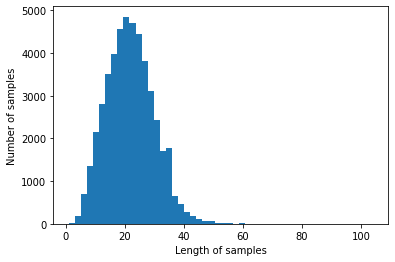

In [49]:
print("Maximum length of samples : ", max(len(l) for l in sentences))
print("Mean length of samples : ", (sum(map(len, sentences))/len(sentences)))

plt.pyplot.hist([len(s) for s in sentences], bins=50)
plt.pyplot.xlabel("Length of samples")
plt.pyplot.ylabel("Number of samples")
plt.pyplot.show()

In [50]:
src_tokenizer = Tokenizer(oov_token="OOV")
tar_tokenizer = Tokenizer(lower=False)

src_tokenizer.fit_on_texts(sentences)
tar_tokenizer.fit_on_texts(ner_tags)

In [51]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1

print("Size of vocabulary set : ", vocab_size)
print("Size of NER Tag set : ", tag_size)

Size of vocabulary set :  31819
Size of NER Tag set :  18


In [52]:
print("Index of OOV : ", src_tokenizer.word_index["OOV"])

Index of OOV :  1


In [53]:
X_data = src_tokenizer.texts_to_sequences(sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [54]:
print(X_data[0])
print(y_data[0])

[254, 6, 967, 16, 1795, 238, 468, 7, 523, 2, 129, 5, 61, 9, 571, 2, 833, 6, 186, 90, 22, 15, 56, 3]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1]


In [55]:
print(tar_tokenizer.index_word)

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat'}


In [56]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word

index_to_ner[0] = "PAD" # 0 for padding

print(index_to_ner)

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat', 0: 'PAD'}


In [57]:
decoded = []
for index in X_data[0] :
    decoded.append(index_to_word[index])

print("Original sentence : ",sentences[0])
print("Decoded sentence : ",decoded)

Original sentence :  ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
Decoded sentence :  ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']


In [58]:
max_len = 70
X_data = pad_sequences(X_data, padding="post", maxlen=max_len)
y_data = pad_sequences(y_data, padding="post", maxlen=max_len)

print(X_data[0])

[ 254    6  967   16 1795  238  468    7  523    2  129    5   61    9
  571    2  833    6  186   90   22   15   56    3    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.2, random_state=1225)

In [60]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [61]:
print("Shape of training sentences sample : ", X_train.shape)
print("Shape of training label sample : ", y_train.shape)
print("Shape of test sentences sample : ", X_test.shape)
print("Shape of test label sample : ", y_test.shape)

Shape of training sentences sample :  (38367, 70)
Shape of training label sample :  (38367, 70, 18)
Shape of test sentences sample :  (9592, 70)
Shape of test label sample :  (9592, 70, 18)


In [62]:
#Model (BiLSTM)

In [66]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
embedding_dim = 128
hidden_units = 256

inputs = Input(shape=(max_len,))
hidden = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs)
hidden = Bidirectional(LSTM(hidden_units, return_sequences=True))(hidden)
outputs = TimeDistributed(Dense(tag_size, activation=("softmax")))(hidden)
model = Model(inputs, outputs)

model.compile(loss="categorical_crossentropy", optimizer=Nadam(0.001), metrics=["accuracy"])

In [70]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history = model.fit(X_train, y_train, batch_size=64, epochs=12, validation_split=0.1, callbacks=es)

Epoch 1/12
540/540 [==============================] - 57s 77ms/step - loss: 0.3699 - accuracy: 0.9095 - val_loss: 0.1650 - val_accuracy: 0.9520
Epoch 2/12
540/540 [==============================] - 15s 28ms/step - loss: 0.1294 - accuracy: 0.9612 - val_loss: 0.1348 - val_accuracy: 0.9604
Epoch 3/12
540/540 [==============================] - 14s 26ms/step - loss: 0.0963 - accuracy: 0.9699 - val_loss: 0.1313 - val_accuracy: 0.9616
Epoch 4/12
540/540 [==============================] - 12s 23ms/step - loss: 0.0801 - accuracy: 0.9742 - val_loss: 0.1346 - val_accuracy: 0.9611
Epoch 5/12
540/540 [==============================] - 12s 23ms/step - loss: 0.0678 - accuracy: 0.9779 - val_loss: 0.1415 - val_accuracy: 0.9599
Epoch 5: early stopping


In [85]:
i = 10

y_predicted = model.predict(np.array([X_test[i]]))
y_predicted = np.argmax(y_predicted, axis=-1)
labels = np.argmax(y_test[i], -1)

1/1 [==============================] - 0s 37ms/step


In [86]:
print("{:15}|{:12}|{}".format("Voca","Real Value", "Predicted"))
for word, tag, pred in zip(X_test[i], labels, y_predicted[0]) :
    if word != 0 :
        print("{:15}|{:12}|{}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

Voca           |Real Value  |Predicted
the            |O           |O
"              |O           |O
roe            |B-per       |B-per
versus         |O           |O
wade           |B-per       |B-per
"              |O           |I-per
supreme        |B-org       |I-org
court          |I-org       |I-org
decision       |O           |O
legalizing     |O           |O
abortion       |O           |O
was            |O           |O
handed         |O           |O
down           |O           |O
on             |O           |O
january        |B-tim       |B-tim
22             |I-tim       |I-tim
,              |I-tim       |I-tim
1973           |I-tim       |I-tim
.              |O           |O


In [ ]:
#F1-score